#**Loading data**

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2022-07-21 18:40:58--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.9’

auto-mpg.data.9     100%[===================>]  29.58K  --.-KB/s    in 0.07s   

2022-07-21 18:40:58 (438 KB/s) - ‘auto-mpg.data.9’ saved [30286/30286]



> Importing necessary packages




In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#One hot encoding the categorical values
from sklearn.preprocessing import OneHotEncoder
#handling missing values
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#Creating a pipeline of tasks to scale all the attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#transforming categorical attributes
from sklearn.compose import ColumnTransformer

#Linear regression
from sklearn.linear_model import LinearRegression
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
#Model evaluation using cross-validation
from sklearn.model_selection import cross_val_score
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#Support vector machine regressor
from sklearn.svm import SVR
#Hyperparameter tuning  of the Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV

#Save the Model
import pickle

import warnings
warnings.filterwarnings('ignore')



> Reading and loading data into CSV



In [ ]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep= " ",skipinitialspace=True)
#reading and loading data
#df = pd.read_csv('/content/auto-mpg.data')

#making a copy of the dataframe
data = df.copy()

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#**Exploratory Data Analysis**

In [ ]:
#taking a look at random samples
data.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
383,38.0,4,91.0,67.0,1965.0,15.0,82,3
384,32.0,4,91.0,67.0,1965.0,15.7,82,3
153,18.0,6,250.0,105.0,3459.0,16.0,75,1
342,30.0,4,135.0,84.0,2385.0,12.9,81,1
192,22.0,6,250.0,105.0,3353.0,14.5,76,1
113,21.0,6,155.0,107.0,2472.0,14.0,73,1
217,30.0,4,111.0,80.0,2155.0,14.8,77,1
193,24.0,6,200.0,81.0,3012.0,17.6,76,1
240,30.5,4,97.0,78.0,2190.0,14.1,77,2
40,14.0,8,351.0,153.0,4154.0,13.5,71,1


In [ ]:
#Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


The horspower column is missing 6 values

In [ ]:
#Check for null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

The 6 missing values in Horsepower are null values

In [ ]:
#Summary of statistics of variables
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


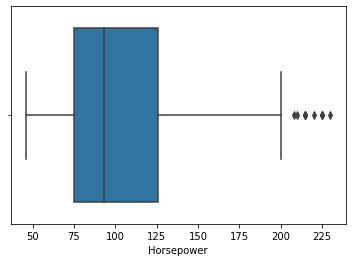

In [ ]:
sns.boxplot(x=data['Horsepower'])

In [ ]:
#Some outliers noted. Missing values will be substituited with the median value
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


All missing values are now filled

In [ ]:
#Checking how many of each cylinder count is there
data['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [ ]:
#Categorty distributions for cylinder count to give an idea of testing distribution
data['Cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [ ]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

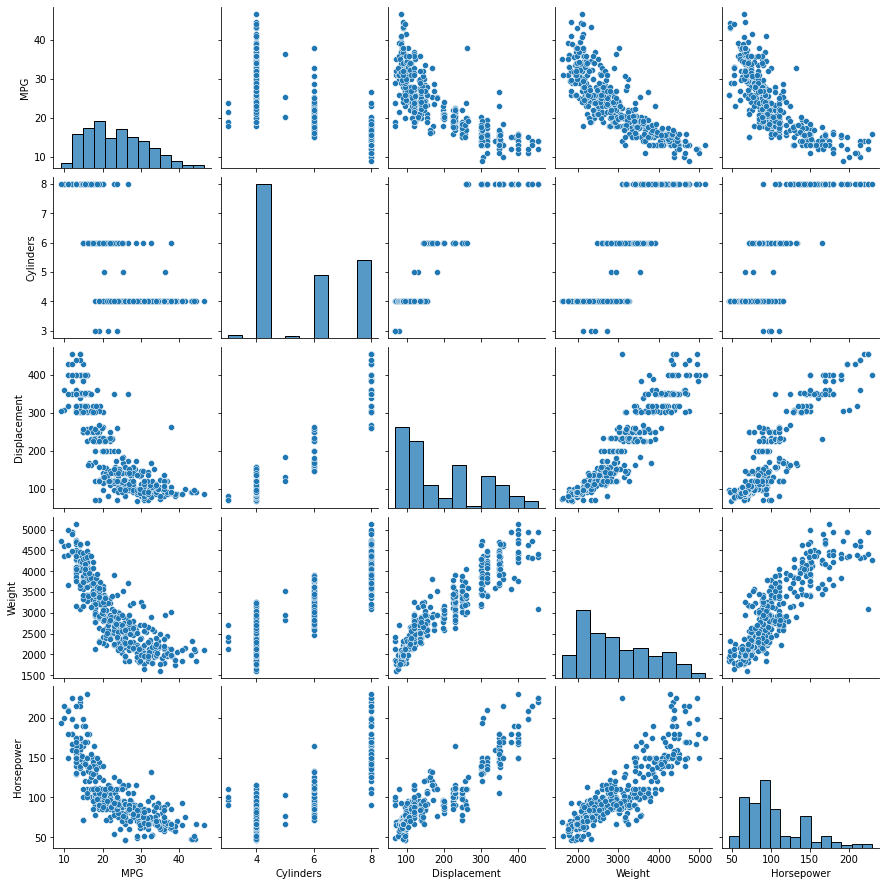

In [ ]:
#Plot for correlation
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind = "hist")

Observations: MPG is negatively correlated with increasing displacement, weight, and horsepower

# **Data Preparation**

In [ ]:
#set aside test data via stratified sampling (homogenous group with the right number of instances of eahc sub-group). From the correlation found in EDA, the cylinder column can be used to create the strate

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index, in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:
#Separating feature variables and target variables
data = strat_train_set.drop("MPG", axis = 1)
data_labels = strat_train_set["MPG"].copy()

In [ ]:
#preprocessing the origin column
def preprocess_origin_column(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df
data_tr = preprocess_origin_column(data)
data_tr.sample(10)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
208,8,318.0,150.0,3940.0,13.2,76,India
133,6,250.0,100.0,3781.0,17.0,74,India
167,4,97.0,75.0,2171.0,16.0,75,Germany
130,4,122.0,80.0,2451.0,16.5,74,India
151,4,79.0,67.0,2000.0,16.0,74,USA
29,4,97.0,88.0,2130.0,14.5,71,Germany
218,4,79.0,58.0,1825.0,18.6,77,USA
238,4,98.0,83.0,2075.0,15.9,77,India
21,4,107.0,90.0,2430.0,14.5,70,USA
326,4,90.0,48.0,2335.0,23.7,80,USA


In [ ]:
data_tr.shape

(318, 7)

In [ ]:
#One Hot Encoding the origin column from the preprocessed data
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [ ]:
#isolating the origin column because of data type "object". it is a categorical column that needs to be deal with
data_category = data_tr[["Origin"]]
data_category.sample(10)

,Origin
8,India
26,India
175,USA
165,India
337,Germany
363,India
314,India
187,India
167,Germany
80,India


In [ ]:
category_encoder = OneHotEncoder()
data_category_1hot = category_encoder.fit_transform(data_category)
data_category_1hot

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [ ]:
#converting the sparse matrix into a numpy array. This example just checks the top five roles
data_category_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
category_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [ ]:
#Handling missing values using SimpleImputer
#Segregating the numerical columns
numerical_data = data.iloc[:, :-1]
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [ ]:
#handling missing values
imputer = SimpleImputer(strategy = "median")
imputer.fit(numerical_data)

SimpleImputer(strategy='median')

In [ ]:
#median of all the columns from the imputer
imputer.statistics_

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

The values above are the medians of all the six columns above


In [ ]:
#checking median from the pandas dataframe
data.median().values

array([   4. ,  146. ,   93.5, 2844. ,   15.5,   76. ])

In [ ]:
#impute the missing values by transforming the dataframe
X = imputer.transform(numerical_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [ ]:
#convert the 2D array back into a dataframe
data_tr = pd.DataFrame(X, columns = numerical_data.columns, index = numerical_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


Horsepower no longer has the missing values
Adding attributes acceleration_on_power and acceleration_on_cylinder using BaseEstimator and Transformer

In [ ]:
numerical_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [ ]:
#tansforming numerical attributes
numerics = ['float64', 'int64']

num_data = data_tr.select_dtypes(include = numerics)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attrs_adder', CustomAttributeAdder()),
    ('std_scaler', StandardScaler())
])

num_data_transform = num_pipeline.fit_transform(num_data)

num_data_transform[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517])

In [ ]:
#transforming categorical attributes

numerical_attributes = list(num_data)
categorical_attributes = ["Origin"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_attributes),
    ("cat", OneHotEncoder(), categorical_attributes)
])

prepared_data = full_pipeline.fit_transform(data)
prepared_data

array([[-0.85657842, -1.07804475, -1.15261228, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.99069325, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31603064, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53192268, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23507113, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.43959149, ...,  1.        ,
         0.        ,  0.        ]])

#**Working with Prediction Models**

> Selecting and training models

* Linear Regression
* Decision Tree
* Random Forest
* SVM regressor

In [ ]:
#separate feature and target variable
data = strat_train_set.drop("MPG", axis = 1)
data_labels = strat_train_set["MPG"].copy()

data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [ ]:
#Preprocess the Origin column in data
def preprocess_origin_column(df):
    df["Origin"] = df["Origin"].map(
        {
            1: "India",
            2: "USA",
            3: "Germany"
        }
    )
    return df

In [ ]:
#creating custom attribute class

acceleration_index, horsepower_index, cylinder_index = 4, 2, 0

class CustomAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acceleration_on_power = True):
        self.acceleration_on_power = acceleration_on_power
    def fit(self, X, y = None):
        return self
    def transform (self, X):
        acceleration_on_cylinder = X[:, acceleration_index] / X[:, cylinder_index]
        if self.acceleration_on_power == True:
            acceleration_on_power = X[:, acceleration_index] / X[:, horsepower_index]
            return np.c_[X, acceleration_on_power, acceleration_on_cylinder]
        return np.c[X, acceleration_on_cylinder]

In [ ]:
#creating the pipeline

def numerical_pipeline_transformer(data):
    '''
    Processes numerical transformations of the dataframe and calls the pipeline class and creates a pipeline.
    Imputes missing values with the median value
    Adds custom attribute acceleration_on_power and acceleration_on_cylinder
    Scales numerical attributes with StandardScaler

    '''
    numerics = ['float64', 'int64']

    numerical_attributes = data.select_dtypes(include = numerics)

    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy= "median")),
        ("attrs_adder", CustomAttributeAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return numerical_attributes, numerical_pipeline

In [ ]:
def pipeline_transformer (data):
    '''
    Completes transformation pipeline for numerical and categorical data.
    One-hot encodes categorical data
    '''
    categorical_attributes = ["Origin"]
    numerical_attributes, numerical_pipeline = numerical_pipeline_transformer(data)

    full_pipeline = ColumnTransformer([
        ("num", numerical_pipeline, list(numerical_attributes)),
        ("cat", OneHotEncoder(), categorical_attributes),
    ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [ ]:
#from raw data to processed data
preprocessed_df = preprocess_origin_column(data)
prepared_data = pipeline_transformer(preprocessed_df)

In [ ]:
prepared_data

array([[-0.85657842, -1.07804475, -1.15261228, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.99069325, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31603064, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53192268, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23507113, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.43959149, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])

In [ ]:
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,USA
156,8,400.0,170.0,4668.0,11.5,75,India
395,4,135.0,84.0,2295.0,11.6,82,India
14,4,113.0,95.0,2372.0,15.0,70,Germany


>**Linear Regression**

In [ ]:
#from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [ ]:
#testing predictions with the Linear Regression Model
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.07706113 27.78221362 26.08507595 12.68921922 22.24811759]


In [ ]:
#Actual label of the samples
print("Actual label of samples: ", list(sample_labels))

Actual label of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


In [ ]:
#Root Mean Squared Error
#from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions) #these are the means squared error
lin_rmse = np.sqrt(lin_mse) #this finds the root meansquare error
lin_rmse

2.9599557382767734

>**Decision Tree**

In [ ]:
#Decision Tree
#from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [ ]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The zero indicates the model overfits the data


In [ ]:
#Model evaluation using cross-validation
#from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg,
    prepared_data,
    data_labels,
    scoring = "neg_mean_squared_error",
    cv = 10
)

tree_reg_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_reg_rmse_scores

array([3.12979632, 3.27366385, 2.91649404, 3.51941046, 2.71131887,
       3.0176046 , 3.90508483, 3.62370667, 4.18272176, 2.50187027])

In [ ]:
tree_reg_rmse_scores.mean()

3.278167165344294

In [ ]:
scores = cross_val_score(
     lin_reg,
     prepared_data,
     data_labels,
     scoring = "neg_mean_squared_error",
     cv = 10
)

lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43029715, 3.45041922, 3.66364877, 2.59538773, 2.48739898,
       2.746598  , 3.32560073, 2.42211361, 3.78139392, 2.86493978])

In [ ]:
lin_reg_rmse_scores.mean()

3.076779788960899

> **Random Forest Model**

In [ ]:
#from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(
    forest_reg,
    prepared_data,
    data_labels,
    scoring = 'neg_mean_squared_error',
    cv = 10
)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)

In [ ]:
forest_reg_rmse_scores.mean()

2.618948433200013

>**Support vector machine regressor**

In [ ]:
#Support vector machine regressor

from sklearn.svm import SVR

In [ ]:
svm_reg = SVR(kernel = 'linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels, scoring = 'neg_mean_squared_error', cv = 10)

svm_rmse_scores = np.sqrt(-svm_cv_scores)

In [ ]:
svm_rmse_scores.mean()

3.088411910825019

*So far Random Forest performs the best due to lowest rmse mean score.
Hyperparameter tuning  of the Random Forest using GridSearchCV*

*Note: Max-Features = 8, n_estimators 30 is lowest*

*checking feature importance*

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2, 3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring = 'neg_mean_squared_error', return_train_score=True, cv = 10)

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score),params)

3.247808728471914 {'max_features': 2, 'n_estimators': 3}
2.9964719510160283 {'max_features': 2, 'n_estimators': 10}
2.8088568218022982 {'max_features': 2, 'n_estimators': 30}
3.3927288401779045 {'max_features': 4, 'n_estimators': 3}
2.8677962853512087 {'max_features': 4, 'n_estimators': 10}
2.8015194408026765 {'max_features': 4, 'n_estimators': 30}
3.153997648203713 {'max_features': 6, 'n_estimators': 3}
2.8143743861618464 {'max_features': 6, 'n_estimators': 10}
2.751927737089274 {'max_features': 6, 'n_estimators': 30}
3.0201990620738846 {'max_features': 8, 'n_estimators': 3}
2.8061337733672382 {'max_features': 8, 'n_estimators': 10}
2.737669050524028 {'max_features': 8, 'n_estimators': 30}
3.6540788632307426 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9511498032614885 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.0203279888770798 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8713769878669035 {'bootstrap': False, 'max_features': 3, 'n_est

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.24133123, 0.27319302, 0.10313994, 0.20411041, 0.01147236,
       0.11928305, 0.02282466, 0.02037377, 0.00185228, 0.00092728,
       0.00149199])

In [ ]:
extra_attributes = ["acceleration_on_power", "acceleration_on_cylinder"]
numerics = ['float64', 'int64']
numerical_attributes = list(data.select_dtypes(include = numerics))

attributes = numerical_attributes + extra_attributes
sorted(zip(attributes, feature_importances), reverse=True)

[('acceleration_on_power', 0.0228246557282462),
 ('acceleration_on_cylinder', 0.020373774799844157),
 ('Weight', 0.20411041388138007),
 ('Model Year', 0.11928304982249752),
 ('Horsepower', 0.1031399422979798),
 ('Displacement', 0.273193021707691),
 ('Cylinders', 0.24133122773486881),
 ('Acceleration', 0.011472356790738785)]

In [ ]:
#Evaluating the entire system on test data
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis = 1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_column(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

2.9912674060412003

In [ ]:
#creating a funciton to cover this entire flow

def predict_mpg(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config

    preproc_df = preprocess_origin_column(df)
    prepared_df = pipeline_transformer(preproc_df)
    print(prepared_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [ ]:
#checking in on a random sample
vehicle_config = {
    'Cylinders' : [4, 6, 8],
    'Displacement' : [155.0, 160.0, 165.5],
    'Horsepower' : [93.0, 130.0, 98.0],
    'Weight' : [2500.0, 3150.0,  2600.0],
    'Acceleration' : [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin' : [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

[[-1.22474487 -1.20484922 -0.85412443 -0.87481777  0.          1.06904497
   0.6684025   1.39127885  1.          0.          0.        ]
 [ 0.         -0.0388661   1.40320441  1.39970842 -1.22474487  0.26726124
  -1.41351982 -0.47596382  0.          0.          1.        ]
 [ 1.22474487  1.24371532 -0.54907999 -0.52489066  1.22474487 -1.33630621
   0.74511732 -0.91531503  0.          1.          0.        ]]


array([32.54      , 18.18666667, 18.89666667])

#**Save the Model**

In [ ]:
with open("model.bin", "wb") as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [ ]:
#loading model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)